In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [64]:
df1 = pd.read_csv('dataset1.csv',header = None)

df2 = pd.read_csv('dataset2.csv',header = None)

In [123]:
class KMeans:
    def __init__(self, n_clusters, init='random', max_iter = 300, tol =1e4):
        self.n_clusters = n_clusters
        self.init = init
        self.max_iter = max_iter
        self.tol = tol
    def _init_centroids(self,init,X):
        n_samples = X.shape[0]
        n_clusters = self.n_clusters
        X= np.array(X)
                
        center_idx = np.random.permutation(n_samples)[:n_clusters]
        centroids = X[center_idx]            
        return centroids
    
    def _kmean_plusplus(self,X):
        centers = []
        n_samples = X.shape[0]
        k1 = np.random.randint(0, n_samples)
        centers.append(k1)
        while len(centers) < self.n_clusters:
            distance = []
            centers_data = X[centers]
            for i in range(X.shape[0]):
                distance.append(np.min(np.square(np.linalg.norm((centers_data - X[i]), axis=1))))
            normalised_distance = distance / np.sum(distance)
            p = np.random.rand()
            cumulative = np.cumsum(normalised_distance).tolist()
            for m in range(n_samples):
                if cumulative[m] >p:
                    centers.append(m)
                    break
                
        return X[centers]
        
    
    def _assign(self,X,centriods):
        n_samples = X.shape[0]
        n_clusters = self.n_clusters       
        dic={}
        
        for i in range(len(centriods)):
            dic[i] =[]
            
        for x in X:
            cur_dis = []
            
            for c in centriods:
                cur_dis.append(np.linalg.norm(x-c))
                
            cur_dis = np.array(cur_dis)
            assign_c = np.argmin(cur_dis)
          
            dic[assign_c].append(x)
            
        return dic
        
    def _updates(self,cluster):
        # list for new centriods
        centriods = []
        for k,v in cluster.items():
            # takes the mean for each cluster
            c = np.mean(v,axis =0)
            centriods.append(c)
            
        centriods = np.array(centriods)
        return centriods
            
    def fit(self,X):
        X = np.array(X)
        n_samples = X.shape[0]
        
        if self.init =='random':
            centriods = self._init_centroids(self.init,X)
        if self.init =='kmean++':
            centriods = self._kmean_plusplus(X)
            
        cur_iter = 1
        # assign points to centorids
        cluster = self._assign(X, centriods)
       
        # update centorids
        centriods_new = self._updates(cluster)
       
        err = np.linalg.norm(centriods-centriods_new)
        while cur_iter < self.max_iter and err>=self.tol:
            if cur_iter % 100 ==0:
                print(err)
            centriods = centriods_new           
            # assign points to centorids
            cluster = self._assign(X,centriods)
            # update centorids
            centriods_new = self._updates(cluster)        
            #compute tol
            err = np.linalg.norm(centriods-centriods_new)
            cur_iter += 1
        return centriods_new
    
    
    
    def compute_cost(self,centorids,dic):
        cost = 0
        total_cost =[]
       
        for centorid,samples in zip(centorids,dic.values()):
            #print(centorid)
            centorid_cost =[]
            for sample in samples:
                sample = np.array(sample)
                sample_cost = np.linalg.norm(sample-centorid)
                centorid_cost.append(sample_cost)
            centorid_cost = np.array(centorid_cost) 
            total_cost.append(np.sum(centorid_cost))
            #print(centorid_cost)
            centorid_cost=[]       
        total_cost = np.array(total_cost)
        return np.sum(total_cost)
    
    def predict(self, X, centorids):
            '''
                X: data
                centriods : centriods
                return 
                    centorids as input
                    cluster as an dictoionary
            '''

            X = np.array(X)
            dic={}

            for i in range(len(centorids)):
                dic[i] =[]            
            for x in X:
                cur_dis = []
                # calculate the minimum distance
                for c in centorids:
                    cur_dis.append(np.linalg.norm(x-c))

                cur_dis = np.array(cur_dis)
                assign_c = np.argmin(cur_dis)

                dic[assign_c].append(x)
            cost =self.compute_cost(centorids,dic)   
            return centorids, dic,cost

In [146]:
def plot_samples_dic1(centriods, dic):
    idx =0
    le = []
    for i in range(len(centriods)):
        s = 'class '+str(i+1)
        le.append(s)
    c ='centriods'
    le.append(c)
    for k,v in dic.items():
        
        v = np.array(v)
    
        plt.plot(v[:,0],v[:,1],'o')
        
    plt.plot(centriods[:,0],centriods[:,1],'s',color = 'black',label ='c')
    plt.legend(le)
    plt.show()
    

    
    
def plot_samples_X1(centriods, X, sample_size):   
    X = np.array(X)
    r_idx = np.random.permutation(len(X))[:sample_size]
    randx = X[r_idx]
    plt.plot(randx[:,0],randx[:,1],'o')
        
    plt.plot(centriods[:,0],centriods[:,1],'s',color = 'black',label ='c')
    plt.legend(['samples','centriods'])
    plt.show()

In [144]:
costs_r=[]
costs_k=[]
k = list(range(2,11))
for i in k:
    temp_costr=[]
    temp_costk=[]
    for run in range(5):        
        KMeans_r = KMeans(n_clusters=i, init='random', max_iter=300, tol= 1e-4)
        KMeans_k = KMeans(n_clusters=i, init='kmean++', max_iter=300, tol= 1e-4)
        cen_r = KMeans_r.fit(df1)
        cen_k = KMeans_k.fit(df1)
        _,_,costr = KMeans_r.predict(df1,cen_r)
        _,_,costk = KMeans_r.predict(df1,cen_k)
        temp_costr.append(costr)
        temp_costk.append(costk)
    temp_costr = np.array(temp_costr)
    temp_costk = np.array(temp_costk)
    costs_r.append(np.min(temp_costr))
    costs_k.append(np.min(temp_costk))

0.04391098968328263


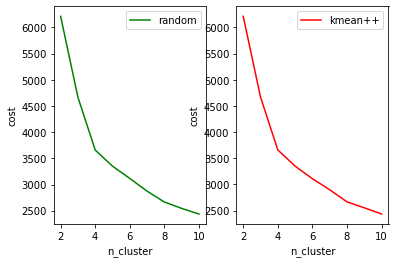

In [145]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(k, costs_r,color='green')
ax2.plot(k,costs_k,color = 'red')
ax1.legend(['random'])
ax2.legend(['kmean++'])
ax1.set_xlabel('n_cluster')
ax1.set_ylabel('cost')
ax2.set_xlabel('n_cluster')
ax2.set_ylabel('cost')
plt.show()

In [147]:
KMeans_r = KMeans(n_clusters=4, init='random', max_iter=300, tol= 1e-4)
KMeans_k = KMeans(n_clusters=4, init='kmean++', max_iter=300, tol= 1e-4)
cen_r = KMeans_r.fit(df1)
cen_k = KMeans_k.fit(df1)
_,dr,costr = KMeans_r.predict(df1,cen_r)
_,dk,costk = KMeans_r.predict(df1,cen_k)


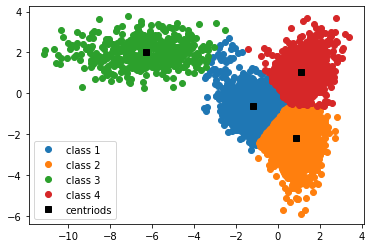

In [150]:
plot_samples_dic1(cen_r,dr)

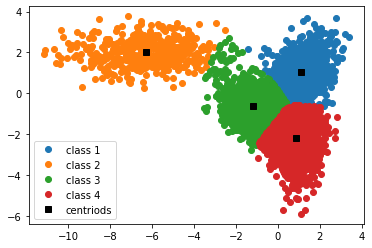

In [152]:
plot_samples_dic1(cen_k,dk)

In [155]:
costs_r=[]
costs_k=[]
k = list(range(2,11))
for i in k:
    temp_costr=[]
    temp_costk=[]
    for run in range(5):        
        KMeans_r = KMeans(n_clusters=i, init='random', max_iter=300, tol= 1e-4)
        KMeans_k = KMeans(n_clusters=i, init='kmean++', max_iter=300, tol= 1e-4)
        cen_r = KMeans_r.fit(df2)
        cen_k = KMeans_k.fit(df2)
        _,_,costr = KMeans_r.predict(df2,cen_r)
        _,_,costk = KMeans_r.predict(df2,cen_k)
        temp_costr.append(costr)
        temp_costk.append(costk)
    temp_costr = np.array(temp_costr)
    temp_costk = np.array(temp_costk)
    costs_r.append(np.min(temp_costr))
    costs_k.append(np.min(temp_costk))

0.007668902648218027
0.008821027253313645
0.013389203798581415
0.059388835758300625
0.060428837256484715
0.14595263394274136
0.007125915512855244
0.022748325373986765
0.14205109369742708
0.13097314790790335
0.05345081670730901
0.016365829711923578
0.029232905760053093
0.052200630997355404
0.03496911524957752


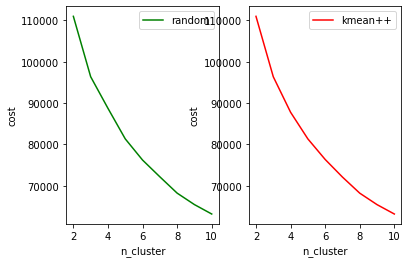

In [156]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(k, costs_r,color='green')
ax2.plot(k,costs_k,color = 'red')
ax1.legend(['random'])
ax2.legend(['kmean++'])
ax1.set_xlabel('n_cluster')
ax1.set_ylabel('cost')
ax2.set_xlabel('n_cluster')
ax2.set_ylabel('cost')
plt.show()

In [165]:
%matplotlib notebook
X2 = np.array(df2)
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.scatter3D(X2[:,0][:10], X2[:,1][:10], X2[:,2][:10])


<IPython.core.display.Javascript object>